# Workshop # 4

In [1]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [97]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
5,0,3,male,NaN,0,0
6,0,1,male,54.0,0,0
7,0,3,male,2.0,3,1
8,1,3,female,27.0,0,2
9,1,2,female,14.0,1,0


In [79]:
cleanup_nums = {"Survived":     {0: "Dead", 1: "Survied"},
               "Pclass": {1:"First Class", 2:"Second Class", 3:"Third Class"},
               "SibSp": {0:"None", 1:"One",2:"Two", 3:"Three", 4:"Four", 
                          5:"Five", 6:"Six", 7:"Seven",8:"Eight"},
               "Parch": {0:"None", 1:"One",2:"Two", 3:"Three", 4:"Four", 
                          5:"Five", 6:"Six", 7:"Seven",8:"Eight"}}


df2.replace(cleanup_nums, inplace=True)
df2


,Survived,Pclass,Sex,Age,SibSp,Parch
0,Dead,Third Class,male,22.0,One,None
1,Survied,First Class,female,38.0,One,None
2,Survied,Third Class,female,26.0,None,None
3,Survied,First Class,female,35.0,One,None
4,Dead,Third Class,male,35.0,None,None
5,Dead,Third Class,male,NaN,None,None
6,Dead,First Class,male,54.0,None,None
7,Dead,Third Class,male,2.0,Three,One
8,Survied,Third Class,female,27.0,None,Two
9,Survied,Second Class,female,14.0,One,None


In [98]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [99]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [100]:
df2['Survived'] = df2['Survived'].astype('category')

In [68]:
df2['Pclass'] = df2['Pclass'].astype('category')
df2['SibSp'] = df2['SibSp'].astype('category')
df2['Parch'] = df2['Parch'].astype('category')

In [83]:
df2['Age'] = pd.cut(df2['Age'], 5)

In [84]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [101]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(df2[['Pclass','Sex','Age','SibSp','Parch']], 
                                                    df2['Survived'], 
                                                    train_size=0.7, 
                                                    random_state=123)
print("Labels for training and testing data")
print(train_X)

Labels for training and testing data
     Pclass     Sex        Age  SibSp  Parch
416       2  female  34.000000      1      1
801       2  female  31.000000      1      1
512       1    male  36.000000      0      0
455       3    male  29.000000      0      0
757       2    male  18.000000      0      0
275       1  female  63.000000      1      0
121       3    male  29.699118      0      0
443       2  female  28.000000      0      0
458       2  female  50.000000      0      0
653       3  female  29.699118      0      0
725       3    male  20.000000      0      0
395       3    male  22.000000      0      0
754       2  female  48.000000      1      2
40        3  female  40.000000      1      0
217       2    male  42.000000      1      0
457       1  female  29.699118      1      0
732       2    male  29.699118      0      0
469       3  female   0.750000      2      1
250       3    male  29.699118      0      0
124       1    male  54.000000      0      1
470       3    mal

/Users/kris/anaconda3/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [102]:
print(train_y)

416    1
801    1
512    1
455    1
757    0
275    1
121    0
443    1
458    1
653    1
725    0
395    0
754    1
40     0
217    0
457    1
732    0
469    1
250    0
124    0
470    0
291    1
169    0
300    1
666    0
885    0
34     0
348    1
163    0
159    0
      ..
817    0
68     1
208    1
608    1
420    0
253    0
846    0
339    0
409    0
111    0
224    1
544    0
73     0
47     1
638    0
113    0
96     0
737    1
214    0
569    1
123    1
106    1
595    0
17     1
742    1
98     1
322    1
382    0
365    0
510    1
Name: Survived, Length: 623, dtype: category
Categories (2, int64): [0, 1]


In [103]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [88]:
train_y.dtype


CategoricalDtype(categories=['Dead', 'Survied'], ordered=False)

In [89]:
train_X['Age'].dtype


CategoricalDtype(categories=[(0.34, 16.336], (16.336, 32.252], (32.252, 48.168], (48.168, 64.084], (64.084, 80.0]]
              ordered=True)

In [90]:

train_X['Pclass'].dtype


dtype('O')

In [91]:

train_X['SibSp'].dtype


dtype('O')

In [92]:

train_X['Parch'].dtype

dtype('O')

In [105]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(["male", "female"])
list(le.classes_)
train_X['Sex'] = le.transform(train_X['Sex'])
test_X['Sex'] = le.transform(test_X['Sex'])

In [106]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB


model = GaussianNB()

model.fit(train_X, train_y);


In [108]:
print("Predicting iris on the test set")

y_pred = model.predict(test_X)


print(classification_report(test_y, y_pred))
print(confusion_matrix(test_y, y_pred))


Predicting iris on the test set
             precision    recall  f1-score   support

          0       0.87      0.76      0.81       170
          1       0.66      0.80      0.72        98

avg / total       0.79      0.77      0.78       268

[[129  41]
 [ 20  78]]


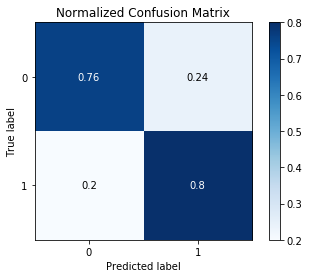

In [109]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(test_y, y_pred, normalize=True)
plt.show()